In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler, OneHotEncoder, PolynomialFeatures, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, VotingRegressor
from sklearn import svm
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
from sklearn.decomposition import PCA

%matplotlib inline

In [21]:
df = pd.read_csv("_prod_df_m1_lower_.csv", sep=";")

features = ['diff_h_l_0',
            'diff_o_c_0',
            #'diff_h_o_0',
            #'diff_c_l_0',
            'vol_total_0',
            'vol_buy_0',
            'vol_sell_0',
            'vol_other_0',
            'nb_tick_total_0',
            'nb_tick_buy_0',
            'nb_tick_sell_0',
            'nb_tick_other_0',
            'nb_price_changed_0',
            'nb_tick_buy_vol_eq_1',
            'nb_tick_sell_vol_eq_1',
            ##'nb_tick_other_vol_eq_1',
            ##'nb_tick_buy_vol_2_5',
            ##'nb_tick_sell_vol_2_5',
            ##'nb_tick_other_vol_2_5'
            ]

label = 'diff_open_low_m1'
X, y = df[features].values, df[label].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=12)

print('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

Training cases: 230
Test cases: 99


SVR()
MSE: 3.442507593397157
MAE: 1.1118372650171706
MedAE: 0.7084305223840789
RMSE: 1.8553995778260695
R2: 0.005756767889391501


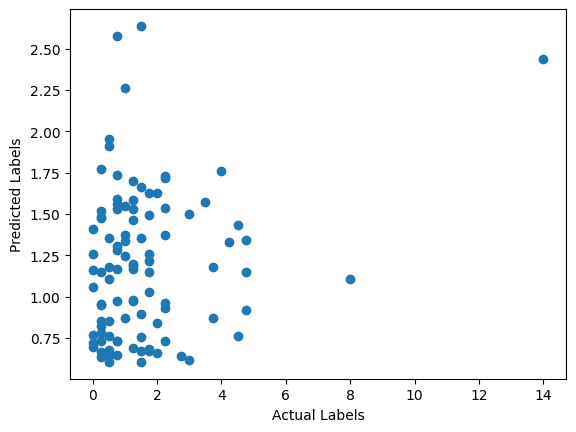

In [22]:
# Fit a linear regression model on the training set
model = SVR()
model.fit(X_train, y_train)
print (model)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
print("MAE:", mean_absolute_error(y_test, predictions))
print("MedAE:", median_absolute_error(y_test, predictions))

rmse = np.sqrt(mse)
print("RMSE:", rmse)


r2 = r2_score(y_test, predictions)
print("R2:", r2)

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')


plt.show()

In [23]:
w = 0
l = 0
for i in range(len(predictions)):
    if predictions[i] > 1.5:
        if y_test[i] < 0.6: l += 1
        else: w +=1

print(w)
print(l)
print(w/(w+l))

21
4
0.84


In [24]:
len(predictions)

99

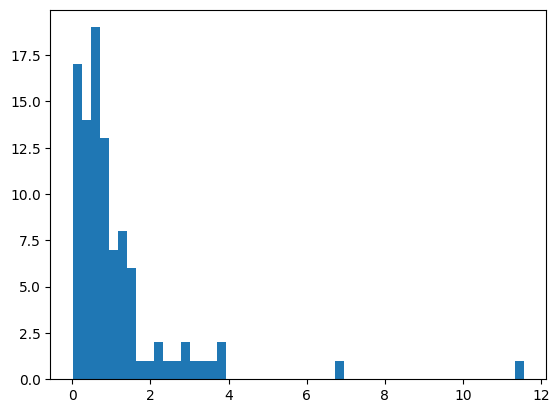

In [25]:
err_hist = np.abs(y_test - predictions)
plt.hist(err_hist, bins=50)
plt.show()

In [26]:
predictions = model.predict(X_test[0:1])

predictions

array([1.34326662])